# `Objective` : 
# Train a regular CNN :VGG19
# Perform grad-CAM on CNN
### `Name` : Sayyad Abdul Bari
### `Roll No`: 22566019

In [1]:
import torchvision
from torch import nnf
from torch.utils.data import DataLoader
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random

In [3]:
from PIL import Image
from torchvision.datasets import ImageFolder
image_path="C:/Users/91958/CV_assignment/archive/Train"

In [4]:
import os
def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [5]:
walk_through_dir(image_path)

There are 43 directories and 0 images in 'C:/Users/91958/CV_assignment/archive/Train'.
There are 0 directories and 210 images in 'C:/Users/91958/CV_assignment/archive/Train\0'.
There are 0 directories and 2220 images in 'C:/Users/91958/CV_assignment/archive/Train\1'.
There are 0 directories and 2010 images in 'C:/Users/91958/CV_assignment/archive/Train\10'.
There are 0 directories and 1320 images in 'C:/Users/91958/CV_assignment/archive/Train\11'.
There are 0 directories and 2100 images in 'C:/Users/91958/CV_assignment/archive/Train\12'.
There are 0 directories and 2160 images in 'C:/Users/91958/CV_assignment/archive/Train\13'.
There are 0 directories and 780 images in 'C:/Users/91958/CV_assignment/archive/Train\14'.
There are 0 directories and 630 images in 'C:/Users/91958/CV_assignment/archive/Train\15'.
There are 0 directories and 420 images in 'C:/Users/91958/CV_assignment/archive/Train\16'.
There are 0 directories and 1110 images in 'C:/Users/91958/CV_assignment/archive/Train\17'.

In [6]:
from torchvision import datasets,transforms
data_trasfrom=transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor()
])

In [7]:
data=ImageFolder(image_path,data_trasfrom)

In [8]:
data

Dataset ImageFolder
    Number of datapoints: 39209
    Root location: C:/Users/91958/CV_assignment/archive/Train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
           )

In [9]:
class_names=data.classes
class_names

['0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '4',
 '40',
 '41',
 '42',
 '5',
 '6',
 '7',
 '8',
 '9']

In [10]:
n=len(data)
train_size=int(0.8*n)
test_size=int(n-train_size)

In [11]:
import torch
from torch.utils.data import random_split
train_data,test_data = torch.utils.data.random_split(data, [0.8, 0.2])

In [12]:
len(train_data),len(test_data)

(31368, 7841)

In [13]:
image,label=train_data[923]

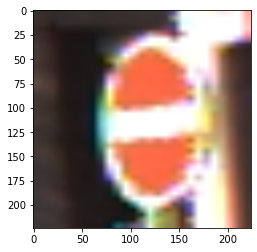

In [14]:
plt.imshow(image.squeeze().permute(1,2,0))

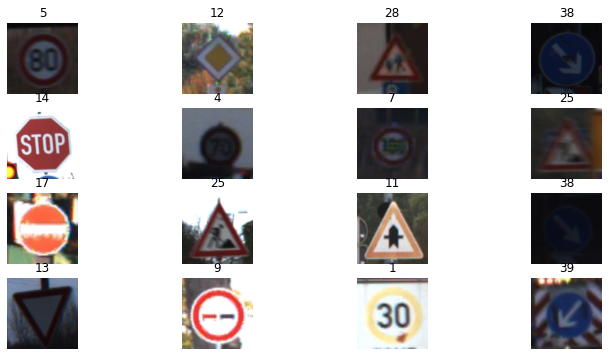

In [15]:
rows,cols=4,4
fig=plt.figure(figsize=(12,6))
for i in range(1,rows*cols+1):
    random_index=torch.randint(0,len(train_data),[1]).item()
    img,cls_label=train_data[random_index]
    fig.add_subplot(rows,cols,i)
    plt.imshow(img.squeeze().permute(1,2,0))
    plt.title(class_names[cls_label])
    plt.axis(False)

In [16]:
train_data_load=DataLoader(dataset=train_data,batch_size=32,shuffle=True)
test_data_load=DataLoader(dataset=test_data,batch_size=32,shuffle=False)

In [17]:
len(train_data_load),len(test_data_load)

(981, 246)

In [18]:
device="cuda" 
device

'cuda'

### Using vgg19

In [20]:
from torchvision.models import vgg19
model_0= vgg19(pretrained=True)
model_0.classifier=torch.nn.Sequential(
    nn.Linear(in_features=25088, out_features=512),
    nn.ReLU(),
    nn.Dropout(p=0.5, inplace=False),
    nn.Linear(in_features=512, out_features=512),
    nn.ReLU(),
    nn.Dropout(p=0.5, inplace=False),
    nn.Linear(in_features=512, out_features=43)
    )
model_0= model_0.to(device)

C:\Users\91958\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [21]:
# Install torchinfo if it's not available, import it if it is
try: 
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo
    
from torchinfo import summary
summary(model_0, input_size=[1, 3, 224, 224]) # do a test pass through of an example input size 

Layer (type:depth-idx)                   Output Shape              Param #
VGG                                      [1, 43]                   --
├─Sequential: 1-1                        [1, 512, 7, 7]            --
│    └─Conv2d: 2-1                       [1, 64, 224, 224]         1,792
│    └─ReLU: 2-2                         [1, 64, 224, 224]         --
│    └─Conv2d: 2-3                       [1, 64, 224, 224]         36,928
│    └─ReLU: 2-4                         [1, 64, 224, 224]         --
│    └─MaxPool2d: 2-5                    [1, 64, 112, 112]         --
│    └─Conv2d: 2-6                       [1, 128, 112, 112]        73,856
│    └─ReLU: 2-7                         [1, 128, 112, 112]        --
│    └─Conv2d: 2-8                       [1, 128, 112, 112]        147,584
│    └─ReLU: 2-9                         [1, 128, 112, 112]        --
│    └─MaxPool2d: 2-10                   [1, 128, 56, 56]          --
│    └─Conv2d: 2-11                      [1, 256, 56, 56]          29

In [22]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model_0.parameters(),lr=0.001)

In [23]:
from tqdm.auto import tqdm
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs=14
for epoch in tqdm(range(epochs)):
    print(f"Epoch:{epoch}\n-------")
    train_loss,train_acc=0,0
    for batch,(X_train,y_train) in enumerate(train_data_load):
        X_train,y_train=X_train.to(device),y_train.to(device)
        model_0.train()
        y_pred=model_0(X_train)
        trn_loss=loss_fn(y_pred,y_train)
        train_loss+=trn_loss.item()   
        train_acc_label=torch.softmax(y_pred,dim=1).argmax(dim=1)
        train_acc+=((train_acc_label==y_train).sum().item())/len(y_pred)
        optimizer.zero_grad()
        trn_loss.backward()
        optimizer.step()
        if batch%500==0:
            print(f"Looked at {batch * len(X_train)}/{len(train_data_load.dataset)} samples")
    train_loss/=len(train_data_load)
    train_acc/=len(train_data_load)
    test_loss,test_acc=0,0
    model_0.eval()
    with torch.inference_mode():
        for X_test,y_test in test_data_load:
            X_test,y_test=X_test.to(device),y_test.to(device)
            y_test_pred=model_0(X_test)
            test_loss+=loss_fn(y_test_pred,y_test).item()
            test_acc_label=torch.softmax(y_test_pred,dim=1).argmax(dim=1)
            test_acc+=((test_acc_label==y_test).sum().item())/len(y_test_pred)
        test_loss/=len(test_data_load)
        test_acc/=len(test_data_load) 
    
    print(f"\nTrain loss: {train_loss:.5f} | train_acc:{train_acc*100:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc*100:.2f}%\n")


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch:0
-------
Looked at 0/31368 samples
Looked at 16000/31368 samples

Train loss: 1.85036 | train_acc:45.65% | Test loss: 0.37516, Test acc: 89.14%

Epoch:1
-------
Looked at 0/31368 samples
Looked at 16000/31368 samples

Train loss: 0.12737 | train_acc:96.39% | Test loss: 0.08221, Test acc: 97.60%

Epoch:2
-------
Looked at 0/31368 samples
Looked at 16000/31368 samples

Train loss: 0.03760 | train_acc:99.00% | Test loss: 0.04806, Test acc: 98.69%

Epoch:3
-------
Looked at 0/31368 samples
Looked at 16000/31368 samples

Train loss: 0.02630 | train_acc:99.31% | Test loss: 0.04074, Test acc: 98.73%

Epoch:4
-------
Looked at 0/31368 samples
Looked at 16000/31368 samples

Train loss: 0.02419 | train_acc:99.25% | Test loss: 0.04875, Test acc: 98.50%

Epoch:5
-------
Looked at 0/31368 samples
Looked at 16000/31368 samples

Train loss: 0.01970 | train_acc:99.41% | Test loss: 0.02314, Test acc: 99.28%

Epoch:6
-------
Looked at 0/31368 samples
Looked at 16000/31368 samples

Train loss: 0.0

In [24]:
y_pred_CNN = []
y_true_CNN=[]
model_0.eval()
with torch.inference_mode():
    for X,y in test_data_load:
        X,y = X.to(device),y.to(device)
        y_test_pred = model_0(X)
        y_pred_tags=torch.softmax(y_test_pred,dim=1).argmax(dim=1)
        y_pred_CNN.append(y_pred_tags.cpu().numpy())
        y_true_CNN.append(y.cpu().numpy())
y_pred_CNN = [a.squeeze().tolist() for a in y_pred_CNN]
y_true_CNN = [a.squeeze().tolist() for a in y_true_CNN]

In [25]:
for i in range(43):
    globals()['class_' + str(i) + '_CNN'] = []

In [26]:
for i in range(245):
    for j in range(len(y_pred_CNN[i])):
        if (y_pred_CNN[i][j]==y_true_CNN[i][j]):
            for k in range(43):
                if k==y_true_CNN[i][j]:
                    globals()['class_' + str(k) + '_CNN'].append(1)
        else:
            for k in range(43):
                if k==y_true_CNN[i][j]:
                    globals()['class_' + str(k) + '_CNN'].append(-1)

In [27]:
CNN_pred_list=[]
for m in range(43):
#         print(f"class_{m} prediction accracy by using CNN ={(sum(globals()['class_' + str(m) + '_CNN'])/len(globals()['class_' + str(m) + '_CNN']))*100:.2f}%")
        c=(sum(globals()['class_' + str(m) + '_CNN'])/len(globals()['class_' + str(m) + '_CNN']))*100
        CNN_pred_list.append(c)  

In [30]:
from vit_pytorch import ViT
model_1 = ViT(
    image_size = 224,
    patch_size = 28,
    num_classes = 43,
    dim = 64,
    depth = 6,
    heads = 10,
    mlp_dim = 512,
    dropout = 0.1,
    emb_dropout = 0.1
).to(device)

In [31]:
model_1

ViT(
  (to_patch_embedding): Sequential(
    (0): Rearrange('b c (h p1) (w p2) -> b (h w) (p1 p2 c)', p1=28, p2=28)
    (1): LayerNorm((2352,), eps=1e-05, elementwise_affine=True)
    (2): Linear(in_features=2352, out_features=64, bias=True)
    (3): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
  )
  (dropout): Dropout(p=0.1, inplace=False)
  (transformer): Transformer(
    (layers): ModuleList(
      (0): ModuleList(
        (0): PreNorm(
          (norm): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
          (fn): Attention(
            (attend): Softmax(dim=-1)
            (dropout): Dropout(p=0.1, inplace=False)
            (to_qkv): Linear(in_features=64, out_features=1920, bias=False)
            (to_out): Sequential(
              (0): Linear(in_features=640, out_features=64, bias=True)
              (1): Dropout(p=0.1, inplace=False)
            )
          )
        )
        (1): PreNorm(
          (norm): LayerNorm((64,), eps=1e-05, elementwise_affine=True)


In [32]:
import torchinfo
from torchinfo import summary
summary(model_1, input_size=[1, 3, 224, 224])

Layer (type:depth-idx)                             Output Shape              Param #
ViT                                                [1, 43]                   4,224
├─Sequential: 1-1                                  [1, 64, 64]               --
│    └─Rearrange: 2-1                              [1, 64, 2352]             --
│    └─LayerNorm: 2-2                              [1, 64, 2352]             4,704
│    └─Linear: 2-3                                 [1, 64, 64]               150,592
│    └─LayerNorm: 2-4                              [1, 64, 64]               128
├─Dropout: 1-2                                     [1, 65, 64]               --
├─Transformer: 1-3                                 [1, 65, 64]               --
│    └─ModuleList: 2-5                             --                        --
│    │    └─ModuleList: 3-1                        --                        230,272
│    │    └─ModuleList: 3-2                        --                        230,272
│    │    └─M

In [33]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model_1.parameters(),lr=0.001)

In [34]:
from tqdm.auto import tqdm
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs=12
for epoch in tqdm(range(epochs)):
    print(f"Epoch:{epoch}\n-------")
    train_loss,train_acc=0,0
    for batch,(X_train,y_train) in enumerate(train_data_load):
        X_train,y_train=X_train.to(device),y_train.to(device)
        model_1.train()
        y_pred=model_1(X_train)
        trn_loss=loss_fn(y_pred,y_train)
        train_loss+=trn_loss.item()
        train_acc_label=torch.softmax(y_pred,dim=1).argmax(dim=1)
        train_acc+=((train_acc_label==y_train).sum().item())/len(y_pred)
        optimizer.zero_grad()
        trn_loss.backward()
        optimizer.step()
        if batch%500==0:
            print(f"Looked at {batch * len(X_train)}/{len(train_data_load.dataset)} samples")
    train_loss/=len(train_data_load)
    train_acc/=len(train_data_load)
    test_loss,test_acc=0,0
    model_1.eval()
    with torch.inference_mode():
        for X_test,y_test in test_data_load:
            X_test,y_test=X_test.to(device),y_test.to(device)
            y_test_pred=model_1(X_test)
            test_loss+=loss_fn(y_test_pred,y_test).item()
            test_acc_label=torch.softmax(y_test_pred,dim=1).argmax(dim=1)
            test_acc+=((test_acc_label==y_test).sum().item())/len(y_test_pred)
        test_loss/=len(test_data_load)
        test_acc/=len(test_data_load) 
    print(f"\nTrain loss: {train_loss:.5f} | train_acc:{train_acc*100:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc*100:.2f}%\n")

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch:0
-------
Looked at 0/31368 samples
Looked at 16000/31368 samples

Train loss: 1.09410 | train_acc:69.48% | Test loss: 0.29077, Test acc: 91.69%

Epoch:1
-------
Looked at 0/31368 samples
Looked at 16000/31368 samples

Train loss: 0.25825 | train_acc:92.22% | Test loss: 0.16658, Test acc: 95.06%

Epoch:2
-------
Looked at 0/31368 samples
Looked at 16000/31368 samples

Train loss: 0.16781 | train_acc:95.08% | Test loss: 0.12799, Test acc: 96.49%

Epoch:3
-------
Looked at 0/31368 samples
Looked at 16000/31368 samples

Train loss: 0.13260 | train_acc:96.16% | Test loss: 0.11514, Test acc: 96.74%

Epoch:4
-------
Looked at 0/31368 samples
Looked at 16000/31368 samples

Train loss: 0.11053 | train_acc:96.63% | Test loss: 0.08251, Test acc: 97.66%

Epoch:5
-------
Looked at 0/31368 samples
Looked at 16000/31368 samples

Train loss: 0.10088 | train_acc:97.00% | Test loss: 0.09372, Test acc: 97.23%

Epoch:6
-------
Looked at 0/31368 samples
Looked at 16000/31368 samples

Train loss: 0.0

In [35]:
y_pred_ViT = []
y_true_ViT=[]
model_1.eval()
with torch.inference_mode():
    for X,y in test_data_load:
        X,y = X.to(device),y.to(device)
        y_test_pred = model_1(X)
        y_pred_tags=torch.softmax(y_test_pred,dim=1).argmax(dim=1)
        y_pred_ViT.append(y_pred_tags.cpu().numpy())
        y_true_ViT.append(y.cpu().numpy())
y_pred_ViT= [a.squeeze().tolist() for a in y_pred_ViT]
y_true_ViT = [a.squeeze().tolist() for a in y_true_ViT]

In [36]:
for i in range(43):
    globals()['class_' + str(i) +'_ViT'] = []

In [37]:
for i in range(245):
    for j in range(len(y_pred_ViT[i])):
        if (y_pred_ViT[i][j]==y_true_ViT[i][j]):
            for k in range(43):
                if k==y_true_ViT[i][j]:
                    globals()['class_' + str(k) +'_ViT'].append(1)
        else:
            for k in range(43):
                if k==y_true_ViT[i][j]:
                    globals()['class_' + str(k) +'_ViT'].append(-1)
            

In [38]:
ViT_pred_list=[]
for m in range(43):
#     print(f"class_{m} prediction accracy by using vision transformer={(sum(globals()['class_' + str(m) +'_ViT'])/len(globals()['class_' + str(m) +'_ViT']))*100:.2f}%\n")
    v=sum(globals()['class_' + str(m) +'_ViT'])/len(globals()['class_' + str(m) +'_ViT'])*100
    ViT_pred_list.append(v)

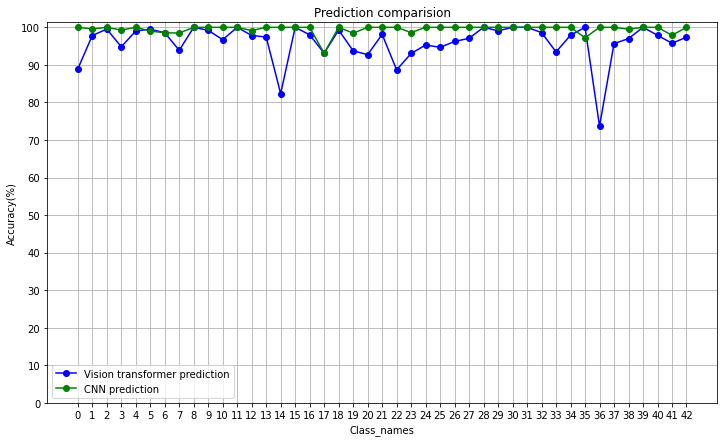

In [39]:
plt.figure(figsize=(12,7))
plt.plot(ViT_pred_list, color='b', marker='o',label='Vision transformer prediction' )
plt.plot(CNN_pred_list, color='g', marker='o',label='CNN prediction')
plt.xticks(range(0,43, 1))
plt.yticks(range(0,101,10))
plt.ylabel('Accuracy(%)',) 
plt.xlabel('Class_names') 
plt.title("Prediction comparision") 
plt.grid()
plt.legend()
plt.show()     

In [45]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [46]:
import cv2
import numpy as np
import torch
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch.autograd import Variable


class GradCam:
    def __init__(self, model):
        self.model = model.eval()
        self.feature = None
        self.gradient = None

    def save_gradient(self, grad):
        self.gradient = grad

    def __call__(self, x):
        image_size = (x.size(-1), x.size(-2))
        datas = Variable(x)
        heat_maps = []
        for i in range(datas.size(0)):
            img = datas[i].data.cpu().numpy()
            img = img - np.min(img)
            if np.max(img) != 0:
                img = img / np.max(img)

            feature = datas[i].unsqueeze(0)
            for name, module in self.model.named_children():
                if name == 'classifier':
                    feature = feature.view(feature.size(0), -1)
                feature = module(feature)
                if name == 'features':
                    feature.register_hook(self.save_gradient)
                    self.feature = feature
            classes = F.sigmoid(feature)
            one_hot, _ = classes.max(dim=-1)
            self.model.zero_grad()
            one_hot.backward()

            weight = self.gradient.mean(dim=-1, keepdim=True).mean(dim=-2, keepdim=True)
            mask = F.relu((weight * self.feature).sum(dim=1)).squeeze(0)
            mask = cv2.resize(mask.data.cpu().numpy(), image_size)
            mask = mask - np.min(mask)
            if np.max(mask) != 0:
                mask = mask / np.max(mask)
            heat_map = np.float32(cv2.applyColorMap(np.uint8(255 * mask), cv2.COLORMAP_JET))
            cam = heat_map + np.float32((np.uint8(img.transpose((1, 2, 0)) * 255)))
            cam = cam - np.min(cam)
            if np.max(cam) != 0:
                cam = cam / np.max(cam)
            heat_maps.append(transforms.ToTensor()(cv2.cvtColor(np.uint8(255 * cam), cv2.COLOR_BGR2RGB)))
        heat_maps = torch.stack(heat_maps)
        return heat_maps

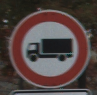

In [48]:
img=Image.open("C:/Users/91958/CV_assignment/archive/Test/00869.png")
img

### Perform grad_cam on vgg19

C:\Users\91958\anaconda3\lib\site-packages\torch\nn\functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


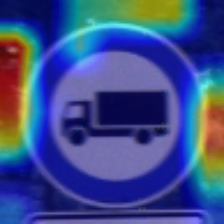

In [49]:
test_image=data_trasfrom(img).unsqueeze(dim=0)
if torch.cuda.is_available():
    test_image = test_image.cuda()
    model_0.cuda()
grad_cam = GradCam(model_0)
feature_image = grad_cam(test_image).squeeze(dim=0)
feature_image = transforms.ToPILImage()(feature_image)
feature_image

In [51]:
pip install timm

Note: you may need to restart the kernel to use updated packages.


In [53]:
pip install nopdb

In [54]:
import urllib

import IPython.display as ipd
import numpy as np
import PIL
import timm
from timm.data import resolve_data_config, create_transform
import torch

import nopdb

In [55]:
model_3= timm.create_model('vit_base_patch16_224', pretrained=True).to(device)
model_3.eval()

VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (norm_pre): Identity()
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=768, out_features=2304, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): Identity()
      (drop_path1): Identity()
      (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): GELU(approximate='none')
        (drop1): Dropout(p=0.0, inplace=False)
        (fc2): Linear(in_features=3072, out_features=768, bias=True)
        (drop2): Dropout(p=0.0, inplace=F

In [56]:
# Get the function to transform the image to a tensor
config = resolve_data_config({}, model=model_3)
transform = create_transform(**config)


# Define some functions to map the tensor back to an image

def inv_normalize(tensor):
    """Normalize an image tensor back to the 0-255 range."""
    tensor = (tensor - tensor.min()) / (tensor.max() - tensor.min()) * (256 - 1e-5)
    return tensor

def inv_transform(tensor, normalize=True):
    """Convert a tensor to an image."""
    tensor = inv_normalize(tensor)
    array = tensor.detach().cpu().numpy()
    array = array.transpose(1, 2, 0).astype(np.uint8)
    return PIL.Image.fromarray(array)

In [57]:
def predict(input):
    """Run the model on an input and print the predicted classes with probabilities."""
    model_3.eval()
    with torch.inference_mode():
        [logits] = model_3(input[None])
        probs = torch.softmax(logits, dim=0)
        topk_prob, topk_id = torch.topk(probs,5)
        for i in range(topk_prob.size(0)):
            
            print(class_names[i], topk_prob[i].item(), sep="\t")

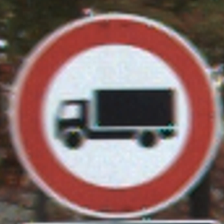

In [59]:
# Load and display our image
img = PIL.Image.open('C:/Users/91958/CV_assignment/archive/Test/00869.png').convert('RGB')
input = transform(img).cuda()
inv_transform(input)

In [60]:
predict(input)

0	0.5054318308830261
1	0.04039453715085983
10	0.029638709500432014
11	0.026712553575634956
12	0.023968808352947235


In [61]:
# Here is where all the magic happens!
with nopdb.capture_call(model_3.blocks[4].attn.forward) as attn_call:
    predict(input)

0	0.5054318308830261
1	0.04039453715085983
10	0.029638709500432014
11	0.026712553575634956
12	0.023968808352947235


In [62]:
# Check the local variables that we captured
attn_call.locals.keys()

dict_keys(['self', 'x', 'B', 'N', 'C', 'qkv', 'q', 'k', 'v', 'attn'])

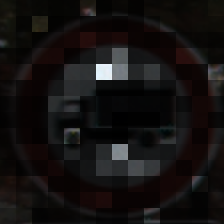

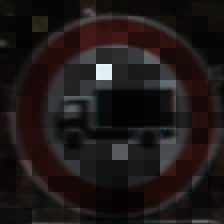

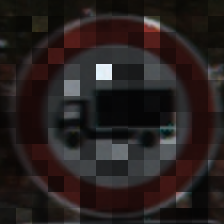

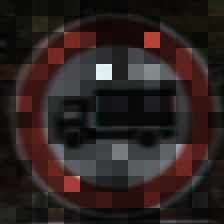

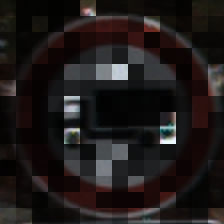

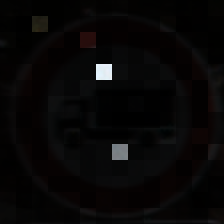

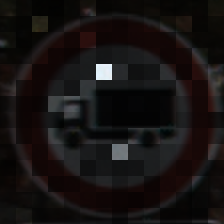

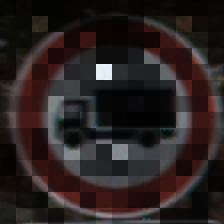

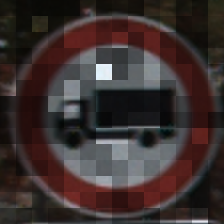

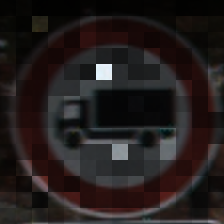

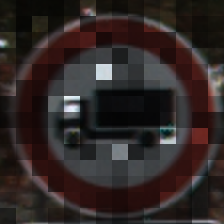

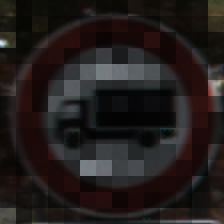

In [63]:
def plot_attention(input, attn):
    """Given an input image and the attention tensor, plot the average attention weight given to each image patch by each attention head."""
    with torch.no_grad():
        # Loop over attention heads
        for h_weights in attn:
            h_weights = h_weights.mean(axis=-2)  # Average over all attention keys
            h_weights = h_weights[1:]  # Skip the [class] token
            plot_weights(input, h_weights)

def plot_weights(input, patch_weights):
    """Display the image, dimming each patch according to the given weight."""
    # Multiply each patch of the input image by the corresponding weight
    plot = inv_normalize(input.clone())
    for i in range(patch_weights.shape[0]):
        x = i * 16 % 224
        y = i // (224 // 16) * 16
        plot[:, y:y + 16, x:x + 16] *= patch_weights[i]
    ipd.display(inv_transform(plot, normalize=False))

plot_attention(input, attn_call.locals['attn'][0])

In [64]:
from timm.models.vision_transformer import Attention

In [65]:
# Set a breakpoint in the Attention module, just before the softmax
with nopdb.breakpoint(function=Attention.forward, line='attn = attn.softmax(dim=-1)') as bp, \
     nopdb.capture_call(model_3.blocks[4].attn.forward) as attn_call:
    bp.exec('attn = attn * 3')
    predict(input)

0	0.018264995887875557
1	0.011225900612771511
10	0.010248403996229172
11	0.010054088197648525
12	0.009760959073901176


### Self Attention

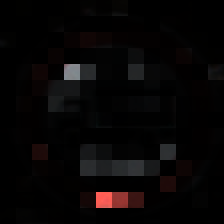

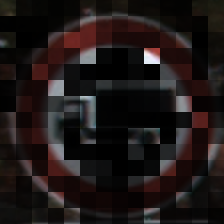

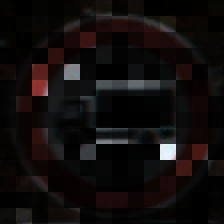

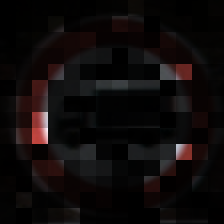

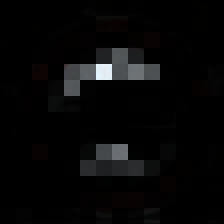

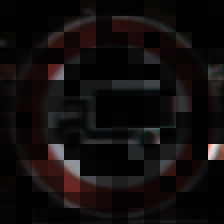

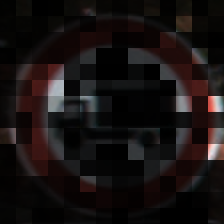

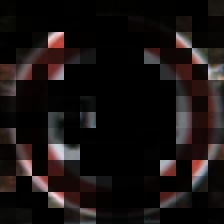

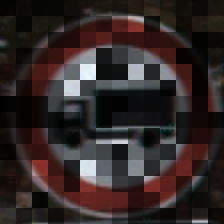

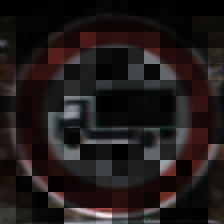

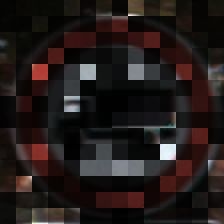

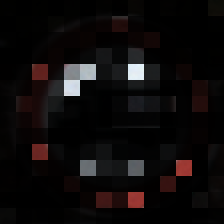

In [66]:
plot_attention(input, attn_call.locals['attn'][0])